In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 16##

### GSIs Defense

In [2]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [3]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [5]:
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [7]:
observed_average = 13.6667

In [15]:
random_sample = scores.sample(27, with_replacement = False).column('Midterm')
simulated_test_statistic = np.average(random_sample)

In [16]:
simulated_test_statistic

15.148148148148149

In [17]:
simulated_averages = make_array()

for i in np.arange(5000):
    random_sample = scores.sample(27, with_replacement = False).column('Midterm')
    simulated_test_statistic = np.average(random_sample)
    simulated_averages = np.append(simulated_averages, simulated_test_statistic)

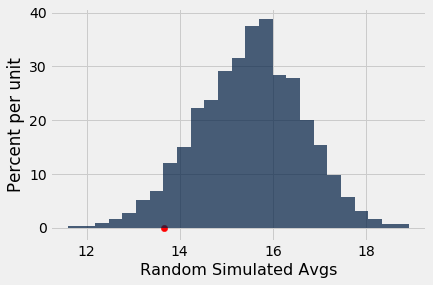

In [18]:
Table().with_column('Random Simulated Avgs', simulated_averages).hist(bins = 25)
plots.scatter(observed_average, 0, color = 'red', s = 40)

### Statistics Significance

In [22]:
sum(simulated_averages <= observed_average) / 5000

0.052999999999999999

In [24]:
np.count_nonzero(simulated_averages <= observed_average) / 5000

0.053

In [42]:
np.count_nonzero(simulated_averages <= 13.628) / 5000

0.0482

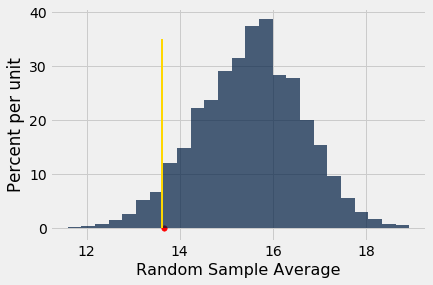

In [45]:
Table().with_column('Random Sample Average', simulated_averages).hist(bins = 25)
plots.scatter(observed_average, 0, color='red', s=30)
plots.plot([13.628, 13.628], [0, 0.35], color='gold', lw=2);

### Swain vs Alabama 

In [ ]:
eligible_population = make_array(0.26, 0.74)

In [ ]:
# Simulation

counts = make_array()

for i in np.arange(10000):
    new_count = 100 * sample_proportions(100, eligible_population).item(0)
    counts = np.append(counts, new_count)

In [ ]:
# Visualization

Table().with_column('Random Sample Count', counts).hist(bins = np.arange(9.5, 45, 1))

observed_count = 8
plots.scatter(observed_count, 0, color='red', s=30);

In [ ]:
# P-Value Calculation


### Mendel and Pea Flowers

In [ ]:
model = make_array(0.75, 0.25)

In [ ]:
# Simulation

distances = make_array()

for i in np.arange(10000):
    new_distance = abs(100 * sample_proportions(929, model).item(0) - 75)
    distances = np.append(distances, new_distance)

In [ ]:
observed_distance =  abs(100*(705/929) - 75)
observed_distance

In [ ]:
Table().with_column('Distance from 75%', distances).hist()
plots.scatter(observed_distance, 0, color='red', s=30);

In [ ]:
# P-Value Calculation


### Alameda Country Jury Panels

In [ ]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

In [ ]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [ ]:
eligible = jury.column('Eligible')

tvds = make_array()

for i in np.arange(10000):
    sample_distribution = sample_proportions(1453, eligible)
    new_tvd = total_variation_distance(sample_distribution, eligible)
    tvds = np.append(tvds, new_tvd)
    

In [ ]:
observed_tvd = total_variation_distance(jury.column('Panels'), eligible)
observed_tvd

In [ ]:
Table().with_column('Total Variation Distance', tvds).hist(bins = 20)
plots.scatter(observed_tvd, 0, color='red', s=30);

In [ ]:
# P-Value Calculation
